# Term Exam 2
## Octavio Villalaz

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var





Call:
glm(formula = bron ~ cigs + poll, family = binomial(), data = csv_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4023  -0.5606  -0.4260  -0.3155   2.3594  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.08491    2.95100  -3.417 0.000632 ***
cigs          0.21169    0.03813   5.552 2.83e-08 ***
poll          0.13176    0.04895   2.692 0.007113 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.78  on 211  degrees of freedom
Residual deviance: 174.21  on 209  degrees of freedom
AIC: 180.21

Number of Fisher Scoring iterations: 5


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8433

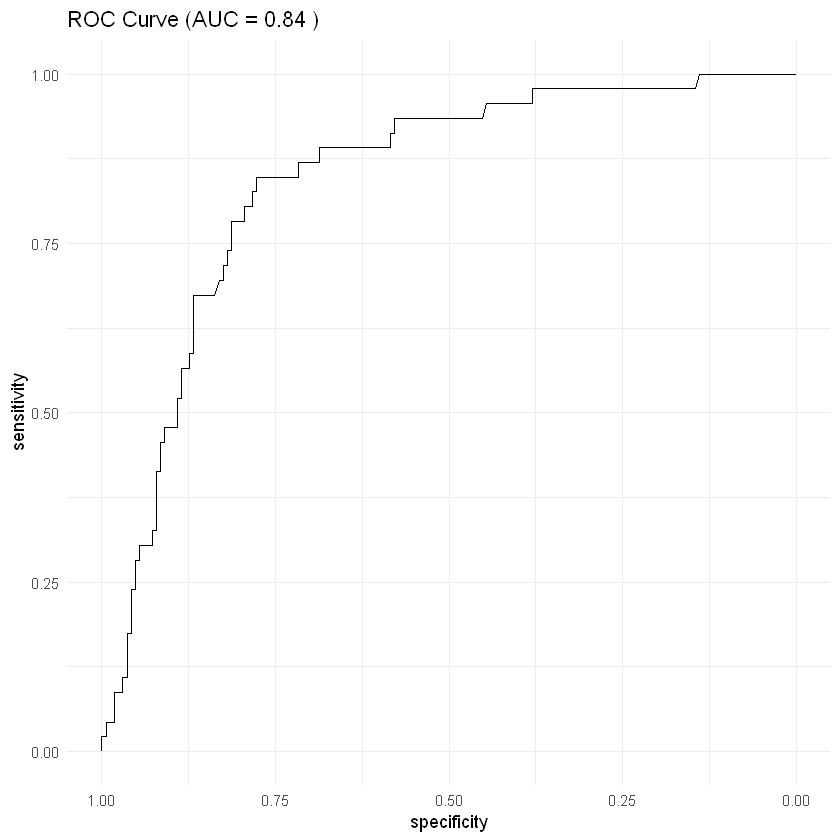

In [1]:
#1)
library(readr)
library(pROC)
library(ggplot2)

csv_data <- read_csv("Bronchitis.csv", show_col_types = FALSE)

model <- glm(bron ~ cigs + poll, data = csv_data, family = binomial())
summary(model)
csv_data$predicted_prob <- predict(model, type = "response")

#ROC curve and AUC
roc_obj <- roc(csv_data$bron, csv_data$predicted_prob)
auc(roc_obj)

# Plot ROC curve
ggroc(roc_obj) +
  ggtitle(paste("ROC Curve (AUC =", round(auc(roc_obj), 2), ")")) +
  theme_minimal()


Statistical Significance: Both smoking (cigs) and pollution (poll) are statistically significant predictors of bronchitis.
</br>
Model Fit: The logistic regression model fits the data well, as evidenced by the significant LLR p-value.
</br>
Model Performance: The AUC value of 0.843 suggests that the model has good discriminatory ability in distinguishing between participants with and without bronchitis.


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




      ID         PC1
1  ST-04  2.22142461
2  ST-13  1.80765851
3  ST-20  1.68171966
4  ST-24  0.97499632
5  ST-23  0.45825051
6  ST-14  0.45378434
7  ST-02  0.45137096
8  ST-16  0.42106246
9  ST-05  0.35462102
10 ST-12  0.21679834
11 ST-21  0.06015555
12 ST-07  0.04933900
13 ST-11 -0.05041742
14 ST-08 -0.05200547
15 ST-17 -0.11489416
16 ST-15 -0.16602559
17 ST-19 -0.19583666
18 ST-01 -0.31879609
19 ST-22 -0.61913997
20 ST-03 -0.75039772
21 ST-06 -1.09146683
22 ST-10 -1.14201585
23 ST-09 -1.28703540
24 ST-25 -1.45429134
25 ST-18 -1.90885876
[1] "PC1 = 0.895855476890976 * DifGeo + 0.881966029292616 * CompAn + 0.932910183377286 * Alg + 0.898143157994253 * RealAn + 0.907609958162356 * Stat"


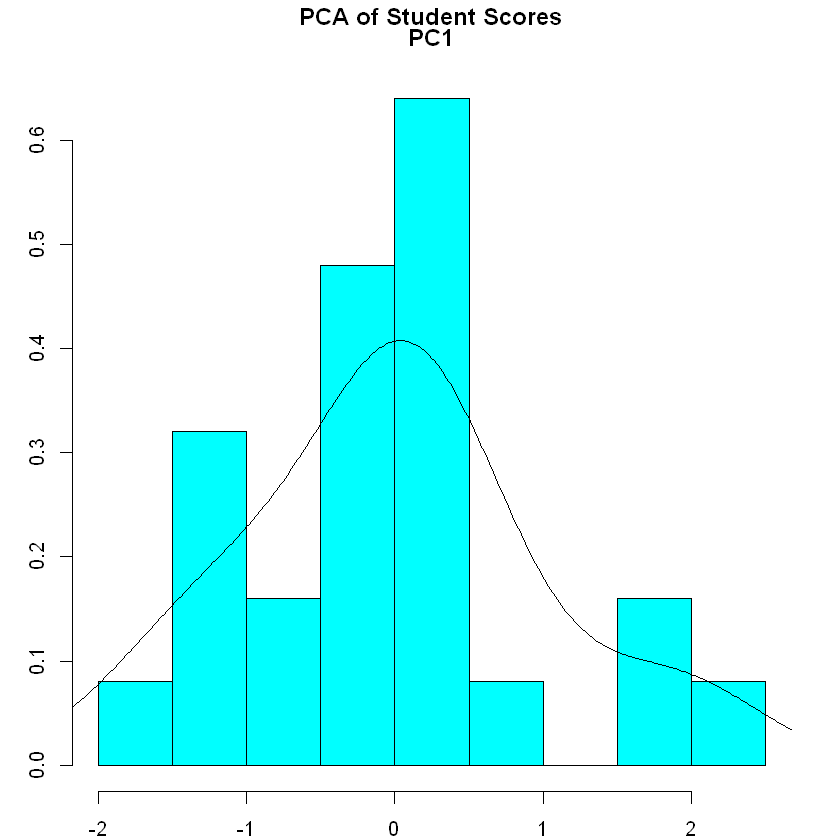

In [2]:
#2)
library(readr)
library(dplyr)
library(psych)

students_scores <- data.frame(
  ID = c('ST-01','ST-02','ST-03','ST-04','ST-05','ST-06','ST-07','ST-08','ST-09','ST-10','ST-11','ST-12','ST-13','ST-14','ST-15',
        'ST-16','ST-17','ST-18','ST-19','ST-20','ST-21','ST-22','ST-23','ST-24','ST-25'),
  DifGeo = c(36, 62, 31, 76, 46, 12, 39, 30, 22, 9, 32, 40, 64, 36, 24, 50, 42, 2, 56, 59, 28, 19, 36, 54, 14),
  CompAn = c(58, 54, 42, 78, 56, 42, 46, 51, 32, 40, 49, 62, 75, 38, 46, 50, 42, 35, 53, 72, 50, 46, 56, 57, 35),
  Alg = c(43, 50, 41, 69, 52, 38, 51, 54, 43, 47, 54, 51, 70, 58, 44, 54, 52, 32, 42, 70, 50, 49, 56, 59, 38),
  RealAn = c(36, 46, 40, 66, 56, 38, 54, 52, 28, 30, 37, 40, 66, 62, 55, 52, 38, 22, 40, 66, 42, 40, 54, 62, 29),
  Stat = c(37, 52, 29, 81, 40, 28, 41, 32, 22, 24, 52, 49, 63, 62, 49, 51, 50, 16, 32, 62, 63, 30, 52, 58, 20)
)
scores <- students_scores[, -1]

# Perform PCA
pca_result <- principal(scores, nfactors = 1, rotate = "none")
# Get the principal component scores
pca_scores <- data.frame(ID = students_scores$ID, PC1 = pca_result$scores)
pca_scores <- pca_scores %>% arrange(desc(PC1))
print(pca_scores)


loadings <- pca_result$loadings
loadings_vector <- loadings[,1]
subjects <- colnames(scores)
formula <- paste("PC1 =", paste(paste(loadings_vector, "*", subjects), collapse = " + "))
print(formula)

# Plot PCA
biplot(pca_result, main = "PCA of Student Scores")

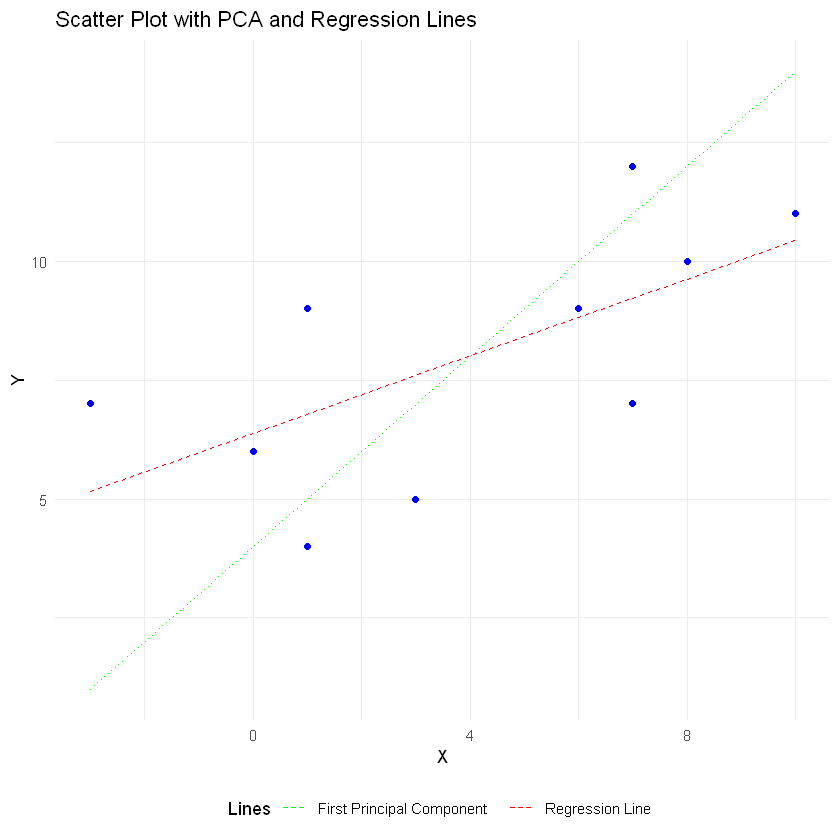

In [3]:
#3)
library(ggplot2)
library(psych)

data <- data.frame(
  X = c(-3, 1, 0, 3, 1, 7, 6, 8, 7, 10),
  Y = c(7, 4, 6, 5, 9, 7, 9, 10, 12, 11)
)
pca_result <- principal(data, nfactors = 2, rotate = "none")
lm_result <- lm(Y ~ X, data = data)

# Regression line
regression_line <- data.frame(
  X = data$X,
  Y = predict(lm_result)
)

#First principal component line
mean_data <- colMeans(data)
pca_slope <- pca_result$loadings[2,1] / pca_result$loadings[1,1]
pca_intercept <- mean_data[2] - pca_slope * mean_data[1]

pc1_line <- data.frame(
  X = seq(min(data$X), max(data$X), length.out = 100),
  Y = pca_slope * seq(min(data$X), max(data$X), length.out = 100) + pca_intercept
)

ggplot(data, aes(x = X, y = Y)) +
  geom_point(color = "blue") +
  geom_line(data = regression_line, aes(x = X, y = Y, color = "Regression Line"), linetype = "dashed") +
  geom_line(data = pc1_line, aes(x = X, y = Y, color = "First Principal Component"), linetype = "dotted") +
  labs(title = "Scatter Plot with PCA and Regression Lines", x = "X", y = "Y", color = "Lines") +
  scale_color_manual(values = c("Regression Line" = "red", "First Principal Component" = "green")) +
  theme_minimal() +
  theme(legend.position = "bottom")